## **SERIES TEMPORALES: MODELOS PREDICTIVOS**

`v2.21`
---



# Modelos TBATS

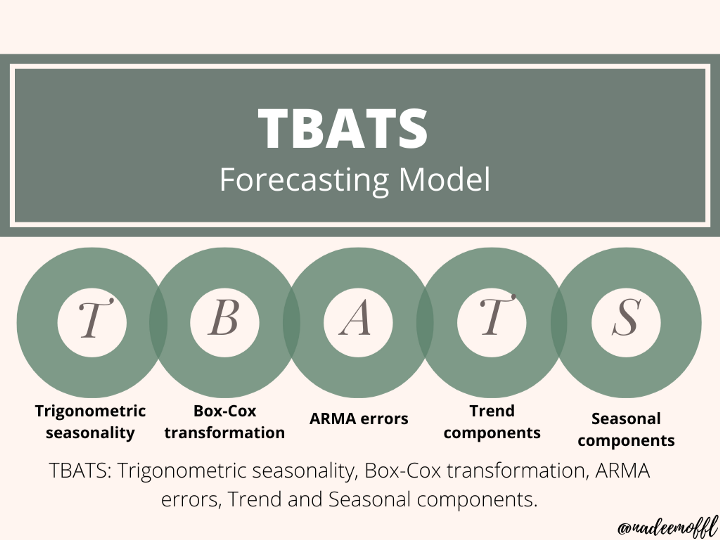)

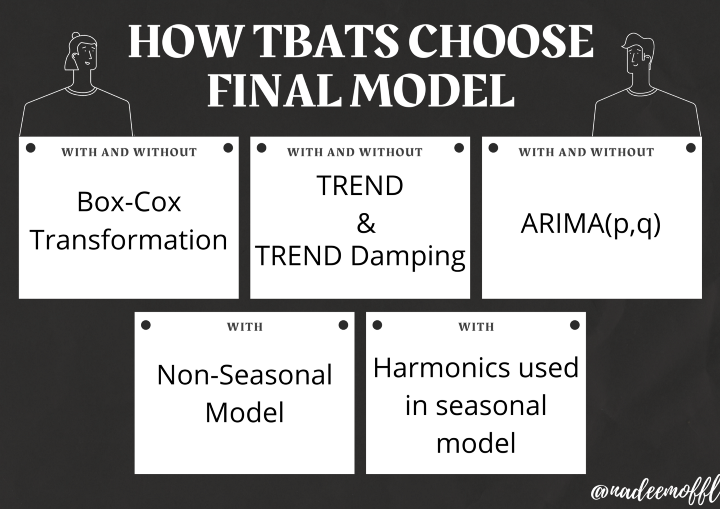

In [ ]:
# 
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/Librerias', nb_path)
#sys.path.insert(0, nb_path)  # or append(nb_path)
sys.path.append(nb_path)  # or append(nb_path)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Es necesario tener instalado DARTS

[Darts: https://unit8co.github.io/darts/index.html](https://unit8co.github.io/darts/index.html)


In [ ]:
#!pip install darts

In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Utilizamos la libreria **darts**
- Seleccionamos los datos de Lineas aereas

In [ ]:
# %%
from darts import TimeSeries
from darts.datasets import AirPassengersDataset


- **Grafico de la Serie Temporal de lineas aereas**



In [6]:

# %%
series = AirPassengersDataset().load()
series


<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

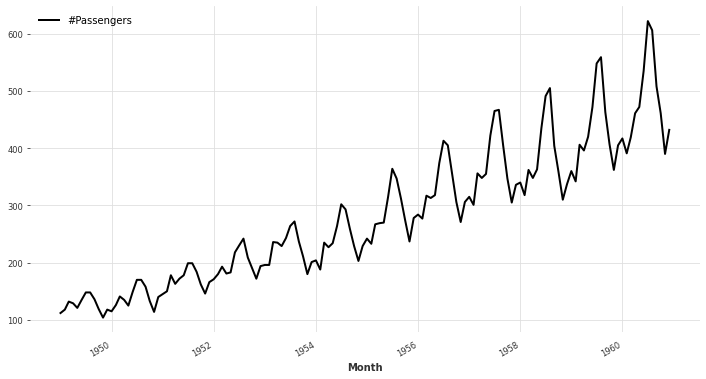

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
series.plot()

- Seleccionamos TRAIN y TEST

Con la fecha

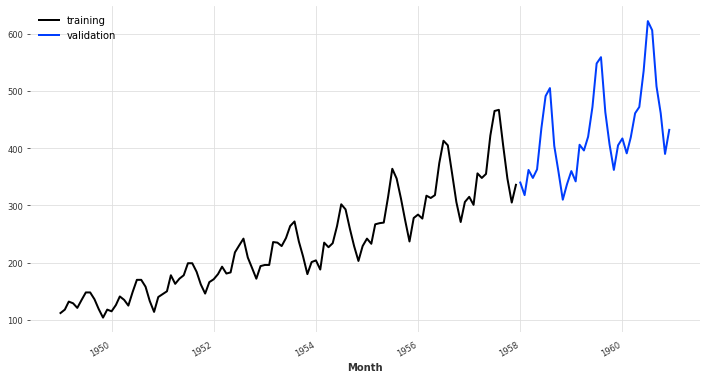

In [8]:

# %%
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")



Comenzamos con el modelo TBATS


TBATS(  
>  use_box_cox=None,  
   box_cox_bounds=(0, 1),  
   use_trend=None,   
   use_damped_trend=None,   
   seasonal_periods='freq',  
   use_arma_errors=True,    
   show_warnings=False,   
   n_jobs=None,   
   multiprocessing_start_method='spawn',   
   random_state=0).








        Parameters
        ----------
        use_box_cox
            If Box-Cox transformation of original series should be applied.
            When ``None`` both cases shall be considered and better is selected by AIC.
        box_cox_bounds
            Minimal and maximal Box-Cox parameter values.
        use_trend
            Indicates whether to include a trend or not.
            When ``None``, both cases shall be considered and the better one is selected by AIC.
        use_damped_trend
            Indicates whether to include a damping parameter in the trend or not.
            Applies only when trend is used.
            When ``None``, both cases shall be considered and the better one is selected by AIC.
        seasonal_periods
            Length of each of the periods (amount of observations in each period).
            TBATS accepts int and float values here.
            BATS accepts only int values.
            When ``None`` or empty array, non-seasonal model shall be fitted.
            If set to ``"freq"``, a single "naive" seasonality
            based on the series frequency will be used (e.g. [12] for monthly series).
            In this latter case, the seasonality will be recomputed every time the model is fit.
        use_arma_errors
            When True BATS will try to improve the model by modelling residuals with ARMA.
            Best model will be selected by AIC.
            If ``False``, ARMA residuals modeling will not be considered.
        show_warnings
            If warnings should be shown or not.
        n_jobs
            How many jobs to run in parallel when fitting BATS model.
            When not provided BATS shall try to utilize all available cpu cores.
        multiprocessing_start_method
            How threads should be started.
            See https://docs.python.org/3/library/multiprocessing.html#contexts-and-start-methods
        random_state
            Sets the underlying random seed at model initialization time.

In [9]:
from darts.models import TBATS
from darts.metrics import mape

In [10]:
#@title

# %%
#from darts.models import TBATS
#from darts.metrics import mape

model =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods="freq",
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))




model (T)BATS obtains MAPE: 5.87%


In [11]:
model.model.params.summary()



'Use Box-Cox: True\nUse trend: True\nUse damped trend: False\nSeasonal periods: [12.]\nSeasonal harmonics [5]\nARMA errors (p, q): (0, 0)\nBox-Cox Lambda 0.000000\nSmoothing (Alpha): 0.716515\nTrend (Beta): 0.043342\nDamping Parameter (Phi): 1.000000\nSeasonal Parameters (Gamma): [-1.39052746e-07 -3.10552796e-08]\nAR coefficients []\nMA coefficients []\nSeed vector [ 4.80861486e+00 -7.34609890e-03 -1.37861709e-01  5.11673014e-02\n -9.66552976e-03  8.11265630e-03  3.50931111e-03  3.51630062e-02\n  6.25539813e-02 -2.57823931e-02 -3.60565963e-02 -1.98084799e-02]\n'

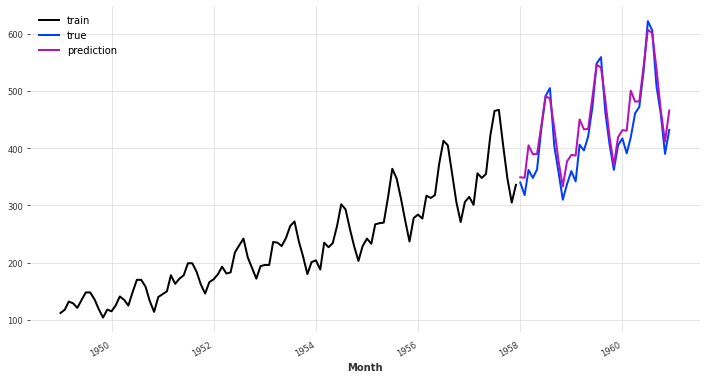

In [12]:
# %%
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

# Usar SKTIME

108 36


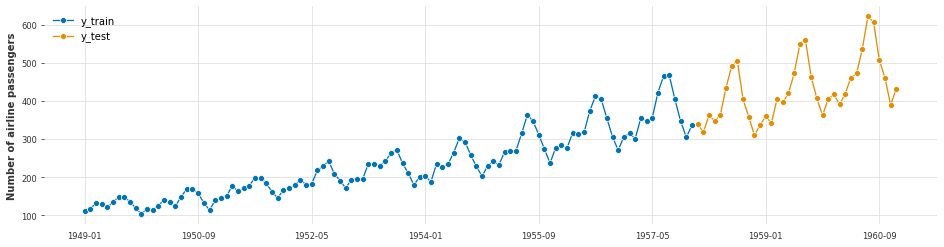

In [13]:
from sktime.datasets import load_airline
from sktime.forecasting.tbats import TBATS # MODELO TBATS
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
y = load_airline()

y_train, y_test = temporal_train_test_split(y =y , test_size=36)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])



class TBATS(use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, sp=None, use_arma_errors=True, show_warnings=True, n_jobs=None, multiprocessing_start_method='spawn', context=None)

In [14]:

forecaster = TBATS(  
    use_box_cox=None,
    use_trend=None,
    use_damped_trend=None,
    sp=12,
    use_arma_errors=True,
    n_jobs=1)
forecaster.fit(y_train)  
# TBATS(...)

TBATS(n_jobs=1, sp=12)

In [15]:
import numpy as np
y_pred = forecaster.predict(fh=np.arange(1, 37))

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f13ba105650>)

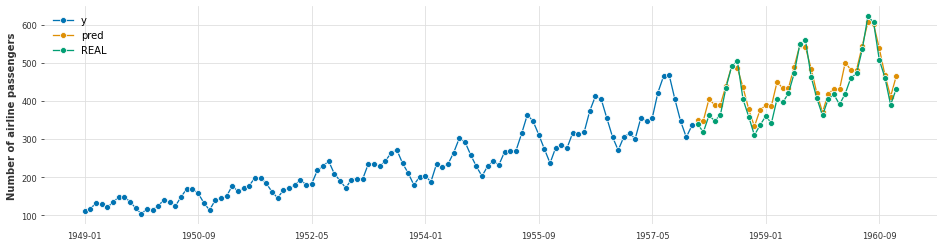

In [16]:
# optional: plotting predictions and past data
plot_series(y_train, y_pred,y_test, labels=["y", "pred", "REAL"])

In [17]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.058711974401062045

# Cross Validation: Historical

In [18]:
from darts.models import TBATS
from darts.metrics import mape

In [19]:


# %%
historical_fcast_tbats = model.historical_forecasts(
    series, start=0.4, forecast_horizon=12, verbose=True, stride=1
)

series.plot(label="data")
historical_fcast_tbats.plot(label="backtest 12-months ahead forecast (Tbats)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_tbats, series)))




  4%|▍         | 3/76 [02:13<54:07, 44.48s/it]


KeyboardInterrupt: ignored

Use Box-Cox: True   
Use trend: True   
Use damped trend: False   
Seasonal periods: [12.]
Seasonal harmonics [5]  
ARMA errors (p, q): (0, 0)  
Box-Cox Lambda 0.000000  
Smoothing (Alpha): 0.716515  
Trend (Beta): 0.043342  
Damping Parameter (Phi): 1.000000  
Seasonal Parameters (Gamma): [-1.39052746e-07 -3.10552796e-08]  
AR coefficients []  
MA coefficients []  


In [20]:
model_best =TBATS(
use_box_cox=True,
box_cox_bounds=(0, 0),
use_trend=True,
use_damped_trend=False,
seasonal_periods="freq",
use_arma_errors=False,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)

In [21]:
# %%
historical_fcast_tbats = model_best.historical_forecasts(
    series, start=0.4, forecast_horizon=12, verbose=True, stride=1
)

series.plot(label="data")
historical_fcast_tbats.plot(label="backtest 12-months ahead forecast (Tbats)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_tbats, series)))


  4%|▍         | 3/76 [01:32<37:42, 30.99s/it]


KeyboardInterrupt: ignored

## BackTest

In [ ]:

# %%


raw_errors = model_best.backtest(
    series, 
    start=0.4, 
    forecast_horizon=12, 
    metric=mape, 
    reduction=None, # None: return errors
    verbose=True
)

from darts.utils.statistics import plot_hist

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",
)



In [ ]:

# %%
average_error = model.backtest(
    series,
    start=0.4,
    forecast_horizon=12,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)




In [ ]:
average_error

In [ ]:
raw_errors

# MODELO DE VENTAS

In [22]:
# Read Data
df = pd.read_csv('/content/mnt/My Drive/Colab Notebooks/Series Temporales/S08/ventas.csv')
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [23]:
df_st = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 en store 1
df_st = df_st.set_index('date')
df_st.tail()

,store,item,sales
date,,,
2017-12-27,1,1,14
2017-12-28,1,1,19
2017-12-29,1,1,15
2017-12-30,1,1,27
2017-12-31,1,1,23


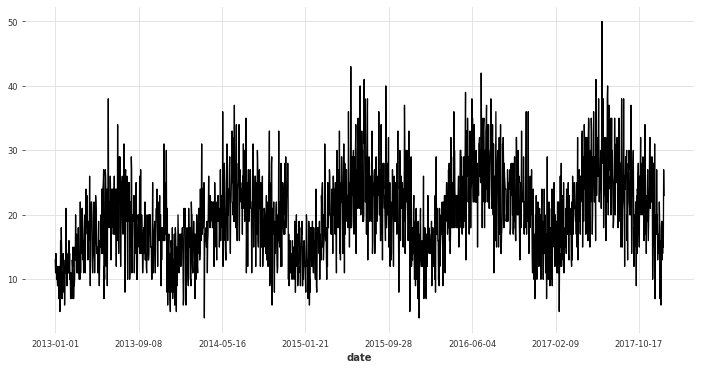

In [24]:
df_st.sales.plot()

In [25]:
from darts.timeseries import TimeSeries
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 en store 1
serie=TimeSeries.from_dataframe(df, time_col="date",value_cols="sales",freq="D")

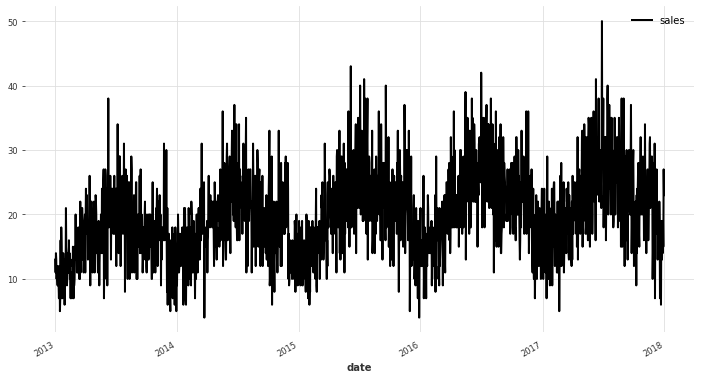

In [26]:
serie.plot()

In [ ]:
serie

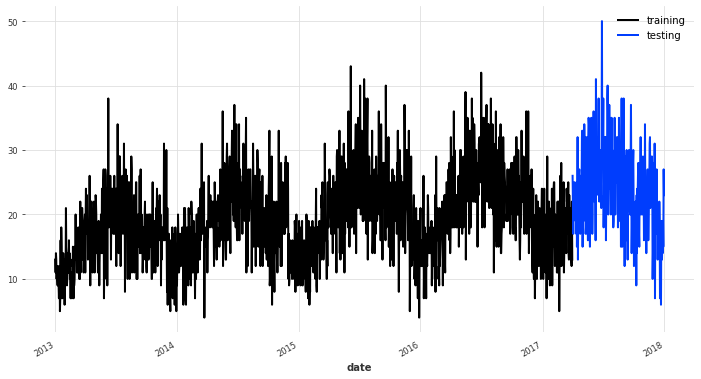

In [31]:
# TRAIN TEST
train,test=serie.split_before(0.85)
train.plot(label="training")
test.plot(label="testing")

In [37]:

model_ventas =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods=(7, 365.25), # Estacionalidad diaria y anual (se pueden poner más)
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)

model_ventas.fit(train)

In [38]:
forecast = model_ventas.predict(len(test))
print("model {} obtains MAPE: {:.2f}%".format(model_ventas, mape(test, forecast)))

model (T)BATS obtains MAPE: 18.03%


In [39]:
model_ventas.model.params.summary()

'Use Box-Cox: False\nUse trend: False\nUse damped trend: False\nSeasonal periods: [  7.   365.25]\nSeasonal harmonics [3 6]\nARMA errors (p, q): (0, 0)\nSmoothing (Alpha): 0.021109\nSeasonal Parameters (Gamma): [6.00672504e-09 1.60528507e-08 3.53090497e-10 9.94440269e-09]\nAR coefficients []\nMA coefficients []\nSeed vector [ 1.67806322e+01 -2.59450843e+00 -2.88116874e-01  1.22127241e+00\n -7.27445760e-01  1.76209079e+00  9.55542321e-01 -4.48161195e+00\n -4.79241056e-02 -1.13618189e+00 -9.04042133e-02 -4.38139692e-01\n  2.94757082e-03 -8.45154188e-01 -8.72717387e-01 -6.25648194e-01\n  2.01545320e-01  4.86454141e-01  6.74035290e-01]\n'

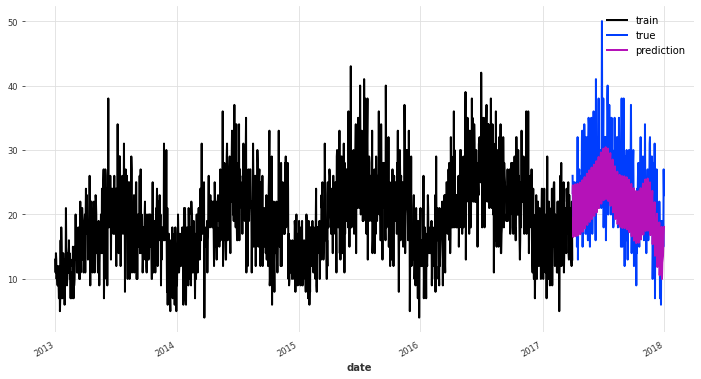

In [40]:
train.plot(label="train")
test.plot(label="true")
forecast.plot(label="prediction")

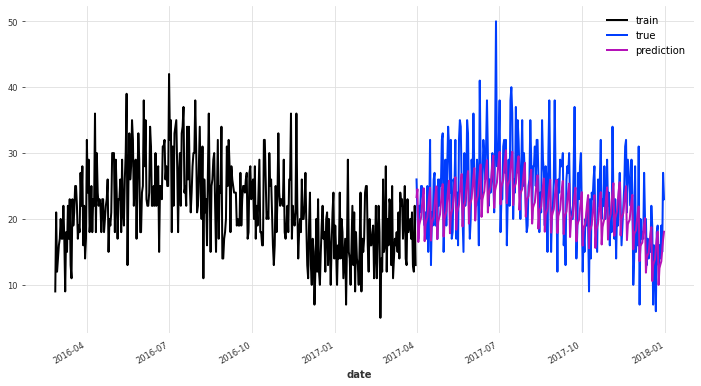

In [41]:
#zoom plot

train[-400:].plot(label="train")
test.plot(label="true")
forecast.plot(label="prediction")